# Семинар 14
# Стохастический градиентный спуск (SGD)




Рассмотрим классическую задачу минимизации функции:

$$f(x) := \mathbb{E}_\xi f(x,\xi) \rightarrow \min_{x \in \mathbb{R}^n}, $$

где $\mathbb{E}_\xi$ - математическое ожидание по переменной $\xi$, закон распределения $\xi$ может быть не известен.

Тогда алгоритм **Stochastic Gradient Descent (SGD):** выглядит следующим образом:

\begin{equation}
  x^{k+1} = x^{k} - h \nabla f(x^{k}, \xi^k)
\end{equation}

## Предположения

***Предположение 1: (Несмещенность градиента)***
\begin{equation}
  \forall x : \;\;\; \mathbb{E}_\xi [\nabla f(x,\xi)] = \nabla f(x)
\end{equation}

***Предпложение 2: (Второй момент)***

\begin{equation}
  \mathbb{E}_\xi [\| \nabla f(x, \xi) \|_2^2] \leq 2 L (f(x) - f(x_*)) + \sigma^2
\end{equation}

***Предпложение 3: (Сильная выпуклость)***

\begin{equation}
  f(x_*) \geq f(x) + \langle \nabla f (x), x_* - x \rangle + \frac{\mu}{2} \| x_* - x \|_2^2
\end{equation}

## Теорема

Пусть выполнены Предположения 1-3 и $h \leq \frac{1}{2L}$, тогда 
\begin{equation}
  \mathbb{E} \| x^{k+1} - x_* \|_2^2 \leq (1-\mu h)^k \| x^0 - x_* \|_2^2 + \frac{h \sigma^2}{\mu}.
\end{equation}

## Предположение 2

\begin{equation}
  \mathbb{E}_\xi [\| \nabla f(x, \xi) \|_2^2] \leq 2 L (f(x) - f(x_*)) + \sigma^2
\end{equation}

Рассмотрим частные случаи, в которых выполняется данное предположение.


### Случай 1 (Липшицевый градиент, без стохастики)

Поскольку в рассматриваемом случае отсутствует стохастика, то можно записать
$$ \nabla f(x, \xi) \equiv \nabla f(x) $$

Из условия липшицивости градиента
$$\|\nabla f(y) - \nabla f(x) \|_2 \leq L \|y - x \|_2$$
следует, что
$$f(y) \leq f(x) + \langle \nabla f(x), y-x \rangle + \frac{L}{2} \|y-x \|_2^2.$$
Тогда $$f(x_*) \leq f(x) - \frac{1}{2L} \| \nabla f(x) \|_2^2 ⇒$$

$$⇒ \;\;\; \| \nabla f(x) \|_2^2 \leq 2L (f(x) - f(x^*))$$
Здесь $\sigma^2 = 0$.

### Случай 2 (случай 1 + Аддитивый шум)

Пусть $\nabla f(x, \xi) = \nabla f(x) + \xi$, где аддитивный шум имеет ограниченный второй момент: $\mathbb{E} \| \xi \|_2^2 \leq \sigma^2$, тогда
$$ \mathbb{E} \| \nabla f(x, \xi)\|_2^2 = \| \nabla f(x) \|_2^2 + \mathbb{E} \| \xi \|_2^2 \leq 2L (f(x) - f(x^*)) + \sigma^2, $$
где $\mathbb{E} \xi = 0.$

### Случай 3 (Задача минимизация суммы) 

Данный случай подразумевает решение задачи минимизации суммы, где функция задана следующим образом:
$$f(x) = \frac{1}{m} \sum_{i = 1}^{m} f_i(x).$$

Данную задачу можно переписать через математическое ожидание как
$$f(x) = \mathbb{E} f_{\xi}(x),$$
где $\xi$ - случайная величина, равномерно распределенная среди значений $1,..,m$.

Тогда проделаем некоторые операции для нахождения второго момента:
$$\mathbb{E}_{\xi} [\| \nabla f_{\xi}(x) \|_2^2] = \mathbb{E}_{\xi} [\| \nabla f_{\xi}(x) - \nabla f_{\xi}(x_*) + \nabla f_{\xi}(x_*) \|_2^2] \leq$$

Пользуясь тем, что $(a+b)^2 \leq 2  a^2 + 2 b^2$, получим следующее
$$ \leq 2 \mathbb{E}_\xi \| \nabla f_\xi (x) - \nabla f_\xi (x_*) \| + 2 \mathbb{E}_\xi \| \nabla f_\xi (x_*) \|_2^2 \leq 4 L (f(x) - f(x_*)) + 2 \mathbb{E}_\xi \| \nabla f_\xi (x_*) \|_2^2, $$


где $2 \mathbb{E}_\xi \| \nabla f_\xi (x_*) \|_2^2 = \frac{2}{m} \sum_{i=1}^m \| \nabla f_\xi (x_*) \|_2^2$ является аналогом $\sigma^2$.

## Доказательство Теоремы

### Вспомагательная Лемма

$$\mathbb{E} \|x^{k+1} - x_* \|^2_2 \leq (1 - \mu h) \mathbb{E} \| x^k - x_* \|_2^2 - h \mathbb{E} (f(x^k) - f(x_*)) + h^2 \sigma^2,$$

где $h \leq \frac{1}{2L}$

### Доказательство Леммы

\begin{equation}
\begin{split}
  \mathbb{E}[\|x^{k+1} - x_* \|_2^2 \;\;\;|\;\;\; \mathfrak{F}_k ]  & = \mathbb{E}[\|x^{k} - x_* \|_2^2 - 2 h \langle \nabla f(x^k, \xi^k), x^{k} - x_*  \rangle + h^2 \| \nabla f(x^k, \xi^k) \|_2^2 \;\;\;|\;\;\; \mathfrak{F}_k ] =\\
  & = \|x^{k} - x_* \|_2^2 - 2 h \langle \nabla f(x^k), x^{k} - x_*  \rangle + h^2 \mathbb{E}[ \| \nabla f(x^k, \xi^k) \|_2^2 \;\;\;|\;\;\; \mathfrak{F}_k ] \leq \\
  & \leq \|x^{k} - x_* \|_2^2 - 2 h (\frac{\mu}{2} \| x^k -x_* \|_2^2 + (f(x^k) - f(x_*))) + h^2 (2L (f(x^k) - f(x_*)) + \sigma^2)
\end{split}
\end{equation}


Теперь перейдем от условного мат ожидания к полному путем $\mathbb{E}_{\mathfrak{F}_k} [\mathbb{E}[\|x^{k+1} - x_* \|_2^2 \;\;\;|\;\;\; \mathfrak{F}_k ]] $ тогда получим

$$\mathbb{E} \|x^{k+1} - x_* \|^2_2 \leq (1 - \mu h) \mathbb{E} \| x^k - x_* \|_2^2 - 2 h(1 - Lh) \mathbb{E} (f(x^k) - f(x_*)) + h^2 \sigma^2$$

Заметим, что $h \leq \frac{1}{2L} \Rightarrow (1 - Lh) \geq \frac{1}{2}$, тогда 

$$\mathbb{E} \|x^{k+1} - x_* \|^2_2 \leq (1 - \mu h) \mathbb{E} \| x^k - x_* \|_2^2 + h^2 \sigma^2$$

Получим нужный нам результат, используя сумму геометрической прогрессии


$$\mathbb{E} \|x^{k+1} - x_* \|^2_2 \leq (1 - \mu h)^k  \| x^0 - x_* \|_2^2 + \frac{h \sigma^2}{\mu}$$

## Иллюстрация

In [ ]:
!pip install d2l==0.16.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 1.1 MB/s 
     |████████████████████████████████| 121 kB 9.0 MB/s 
     |████████████████████████████████| 1.6 MB 38.0 MB/s 
     |████████████████████████████████| 83 kB 886 kB/s 


In [ ]:
from matplotlib import pyplot as plt
from d2l import torch as d2l
import math
import torch

/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
<ipython-input-3-bf104f76876e>:16: UserWarning: The following kwargs were not used by contour: 'color'
  d2l.plt.contour(x1, x2, f(x1, x2), color="blue")


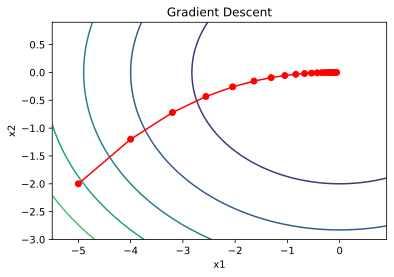

In [ ]:
f = lambda x1, x2: x1**2 + 2 * x2**2
gradf = lambda x1, x2: (2 * x1, 4 * x2)

def train_2d(trainer, steps=20):
  x1, x2, s1, s2 = -5, -2, 0, 0
  results = [(x1, x2)]
  for i in range(steps): 
    x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
    results.append((x1, x2))
  return results

def show_trace_2d(f, results):
  d2l.set_figsize()
  d2l.plt.plot(*zip(*results), '-o', color='red')
  x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1), torch.arange(-3.0, 1.0, 0.1))
  d2l.plt.contour(x1, x2, f(x1, x2), color="blue")
  d2l.plt.xlabel('x1')
  d2l.plt.ylabel('x2')
  
  
def gd(x1, x2, s1, s2):
  (g1, g2) = gradf(x1, x2)
  return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
plt.title("Gradient Descent")
show_trace_2d(f, train_2d(gd))

<ipython-input-3-bf104f76876e>:16: UserWarning: The following kwargs were not used by contour: 'color'
  d2l.plt.contour(x1, x2, f(x1, x2), color="blue")


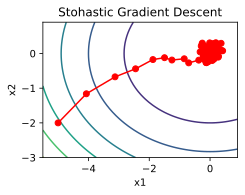

In [ ]:
f = lambda x1, x2: x1**2 + 2 * x2**2
gradf = lambda x1, x2: (2 * x1, 4 * x2)

    
def sgd(x1, x2, s1, s2):
  global lr
  (g1, g2) = gradf(x1, x2)
  # Simulate noisy gradient
  g1 += torch.normal(0.0, 1, (1,))
  g2 += torch.normal(0.0, 1, (1,))
  eta_t = eta * lr()
  return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
lr = (lambda: 1)
plt.title("Stohastic Gradient Descent")
show_trace_2d(f, train_2d(sgd, steps=150))

## Полезные ссылки



*   [About SGD](https://arxiv.org/pdf/1907.04232.pdf)
*   [Сравнение методов](https://bl.ocks.org/EmilienDupont/aaf429be5705b219aaaf8d691e27ca87)

